In [1]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [2]:
# define instruments to download
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'AMC  Entertainment':'AMC',
 'Plug Power':'PLUG',
 'Evotec SE':'EVO',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Ford': 'F',
 'Bank of America': 'BAC',
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [3]:
# Define which online source to use
data_source = 'yahoo'
start_date = '2017-01-01'
end_date = '2022-01-01'
panel_data = pdr.get_data_yahoo(list(companies_dict.values()),start_date, end_date)

print(panel_data.axes)

[*********************100%***********************]  27 of 27 completed
[DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None), MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'AMC'),
            ('Adj Close', 'AMZN'),
            ('Adj Close',  'AXP'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'BAC'),
            ('Adj Close',  'CVX'),
            ('Adj Close',  'EVO'),
            ('Adj Close',    'F'),
            ('Adj Close',   'GE'),
            ...
            (   'Volume',  'MCD'),
            (   'Volume', 'MSFT'),
            (   'Volume', 

In [4]:
panel_data.isna().sum()

Adj Close  AAPL    0
           AMC     0
           AMZN    0
           AXP     0
           BA      0
                  ..
Volume     TM      0
           TXN     0
           VLO     0
           WBA     0
           XOM     0
Length: 162, dtype: int64

In [5]:
print(panel_data.head())

            Adj Close                                                          \
                 AAPL        AMC       AMZN        AXP          BA        BAC   
Date                                                                            
2017-01-03  27.133326  27.085867  37.683498  68.568100  145.533661  19.755684   
2017-01-04  27.102957  26.657173  37.859001  69.692177  147.063461  20.123970   
2017-01-05  27.240786  26.501280  39.022499  68.833122  147.146896  19.887215   
2017-01-06  27.544470  26.345388  39.799500  68.970184  147.508484  19.887215   
2017-01-09  27.796768  25.955664  39.846001  69.326622  146.785309  19.773220   

                                                     ...   Volume            \
                  CVX     EVO         F          GE  ...      MCD      MSFT   
Date                                                 ...                      
2017-01-03  90.231491  4.0700  9.296362  175.920242  ...  5123800  20694100   
2017-01-04  90.208534  4.0625  9.72

In [6]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

AAPL     29.037500
AMC      34.750000
AMZN     37.683498
AXP      75.349998
BA      156.970001
BAC      22.530001
CVX     117.849998
EVO       4.070000
F        12.590000
GE      190.296036
HMC      29.610001
IBM     159.837479
INTC     36.599998
JNJ     115.839996
KO       41.799999
LMT     253.309998
MA      105.389999
MCD     119.620003
MSFT     62.580002
NOC     234.889999
PEP     104.650002
PLUG      1.210000
TM      118.550003
TXN      73.580002
VLO      70.419998
WBA      82.959999
XOM      90.889999
Name: 2017-01-03 00:00:00, dtype: float64


In [7]:
print(stock_open.iloc[0])

AAPL     28.950001
AMC      34.049999
AMZN     37.896000
AXP      74.889999
BA      156.300003
BAC      22.600000
CVX     118.379997
EVO       3.987500
F        12.200000
GE      190.175949
HMC      29.480000
IBM     159.655838
INTC     36.610001
JNJ     115.779999
KO       41.500000
LMT     251.199997
MA      104.410004
MCD     121.860001
MSFT     62.790001
NOC     234.100006
PEP     104.940002
PLUG      1.200000
TM      118.169998
TXN      73.529999
VLO      69.550003
WBA      83.099998
XOM      90.940002
Name: 2017-01-03 00:00:00, dtype: float64


In [8]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

print(movements)

[[ 0.08749962  0.04249954  0.17250061 ...  0.05000305 -1.27000427
  -0.51998901]
 [ 0.70000076  0.20000076 -0.25       ...  0.20000076  1.03000069
  -1.55999947]
 [-0.21250153 -0.06049728  0.94499969 ... -1.63899231 -1.05549622
  -2.23899841]
 ...
 [ 0.86999512 -1.65000153 -0.70999908 ...  0.33000183 -0.44000244
   1.02000427]
 [-0.13999939 -0.31999969  1.02999878 ...  0.79999924 -0.36999893
   0.25999832]
 [-0.05000305 -1.23000336 -1.63999939 ... -0.32999802 -0.43000031
   0.44999695]]


In [9]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], movements[i][0]))

Company: Apple, Change: 0.08749961853027344
Company: AMC  Entertainment, Change: 0.7000007629394531
Company: Amazon, Change: -0.21250152587890625
Company: American Express, Change: 0.45999908447265625
Company: Boeing, Change: 0.6699981689453125
Company: Bank of America, Change: -0.06999969482421875
Company: Chevron, Change: -0.529998779296875
Company: Evotec SE, Change: 0.08250021934509277
Company: Ford, Change: 0.3900003433227539
Company: General Electric, Change: 0.120086669921875
Company: Honda, Change: 0.13000106811523438
Company: IBM, Change: 0.181640625
Company: Intel, Change: -0.01000213623046875
Company: Johnson & Johnson, Change: 0.05999755859375
Company: Coca Cola, Change: 0.2999992370605469
Company: Lockheed Martin, Change: 2.1100006103515625
Company: MasterCard, Change: 0.9799957275390625
Company: McDonalds, Change: -2.2399978637695312
Company: Microsoft, Change: -0.20999908447265625
Company: Northrop Grumman, Change: 0.7899932861328125
Company: Pepsi, Change: -0.2900009155

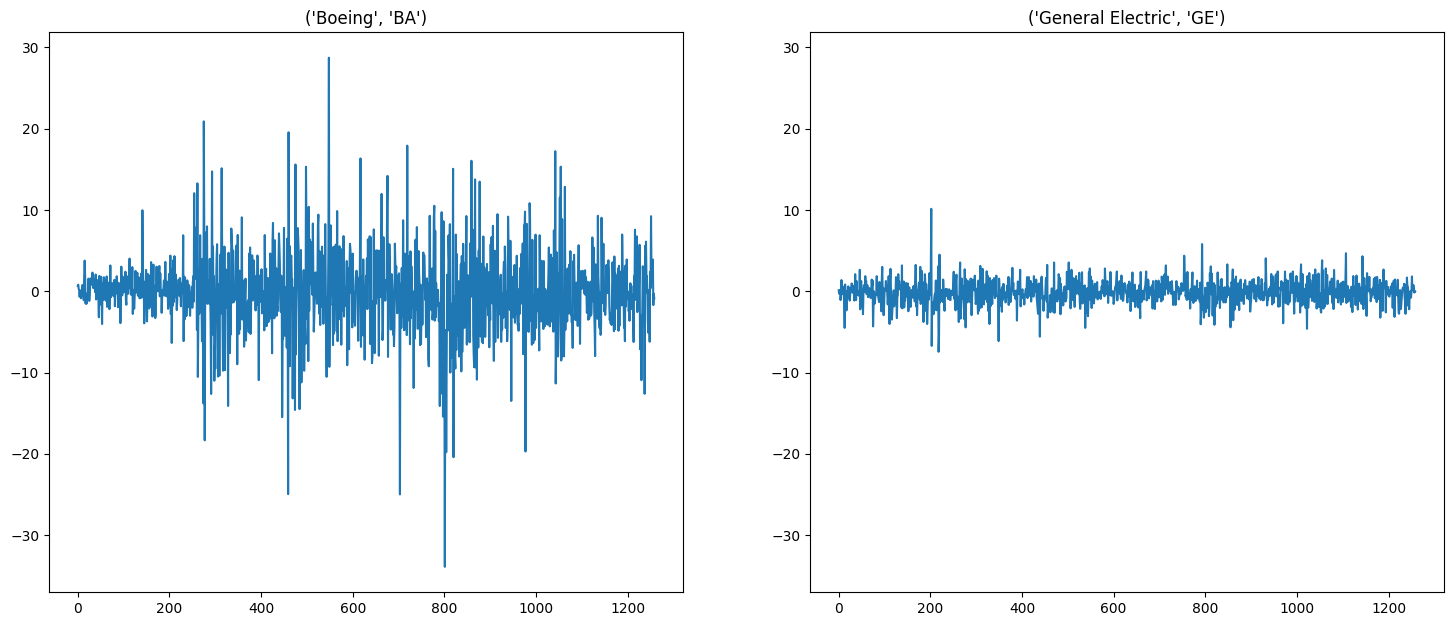

In [10]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[4][:])
plt.title(companies[4])

plt.subplot(222, sharey=ax1)
plt.plot(movements[9][:])
plt.title(companies[9])
plt.show()

In [11]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.5799640685759595
-0.2988276768979226
-0.0004717450992568288


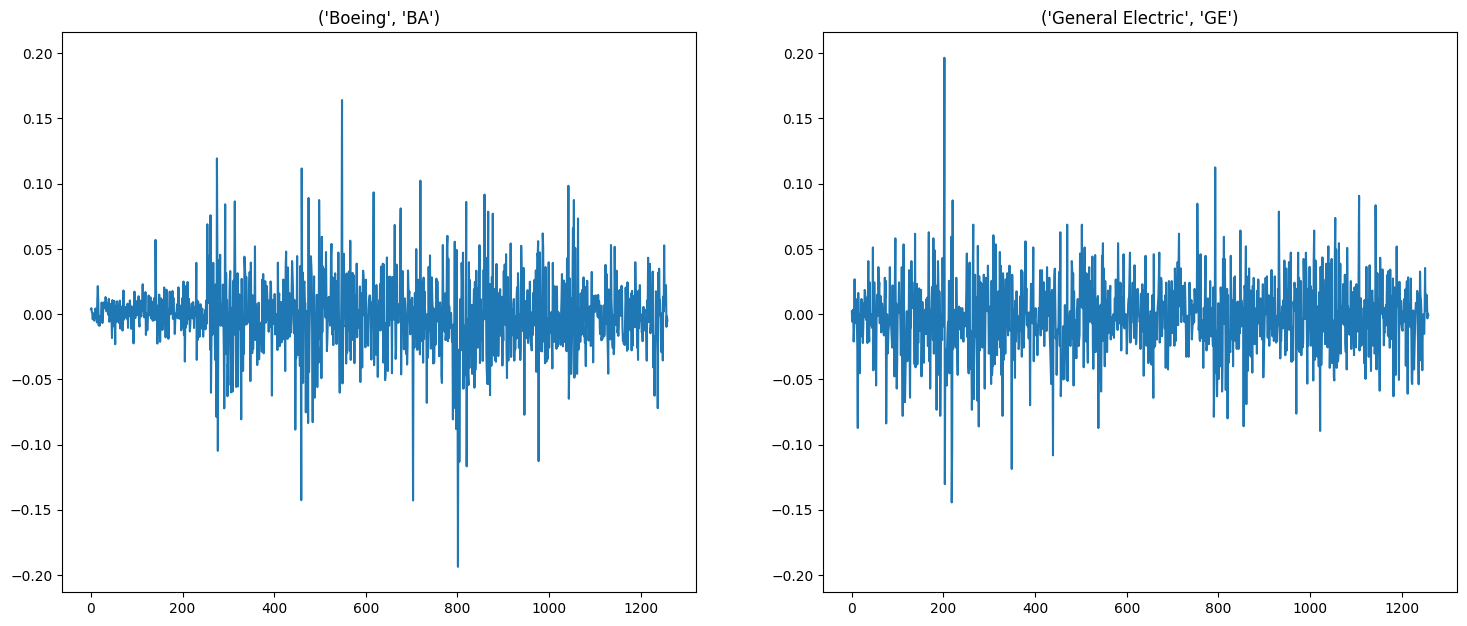

In [12]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(new[4][:])
plt.title(companies[4])

plt.subplot(222, sharey=ax1)
plt.plot(new[9][:])
plt.title(companies[9])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

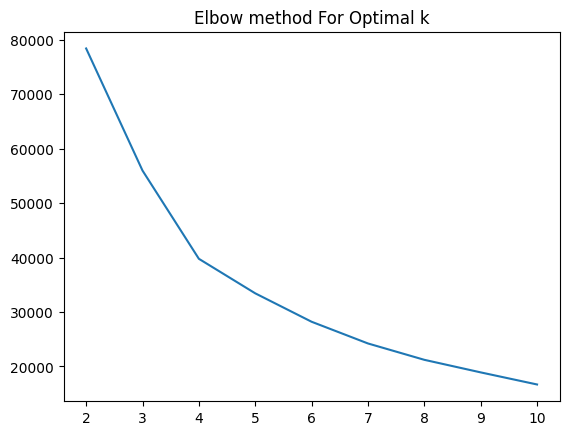

In [13]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

wcss = []
for i in range(2,11):
  kmean = KMeans(n_clusters = i, init = 'k-means++', n_init = 100, max_iter=300,random_state=0)
  kmean.fit(movements)
  wcss.append(kmean.inertia_)
plt.title('Elbow method For Optimal k')
plt.plot(range(2,11),wcss)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

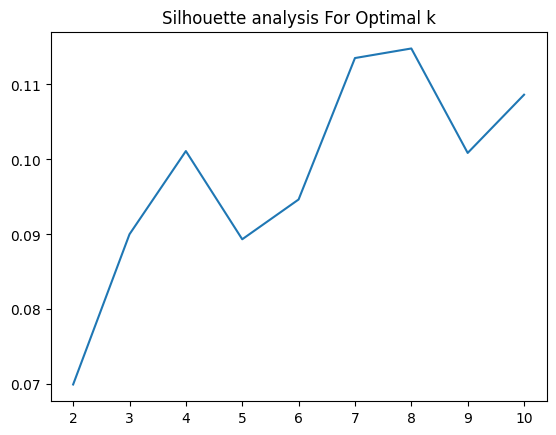

In [14]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 100, max_iter=300,random_state=0)
  kmeans.fit(new)
  cluster_labels = kmeans.labels_
  silhouette_avg.append(silhouette_score(new,cluster_labels))
plt.title('Silhouette analysis For Optimal k')
plt.plot(range(2,11),silhouette_avg)
plt.show

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


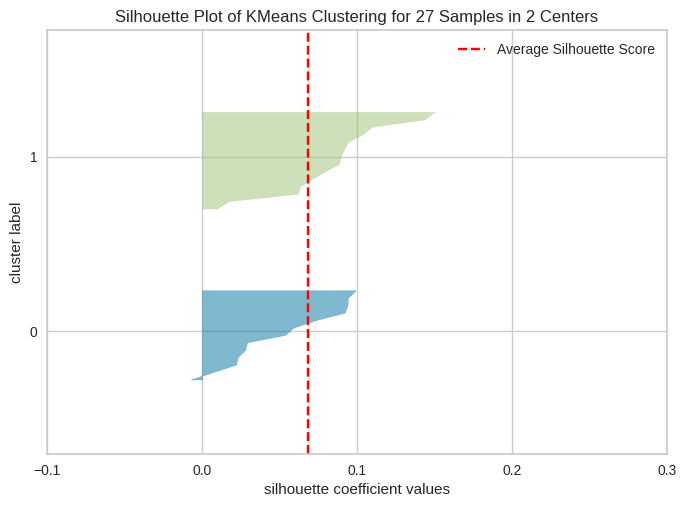

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


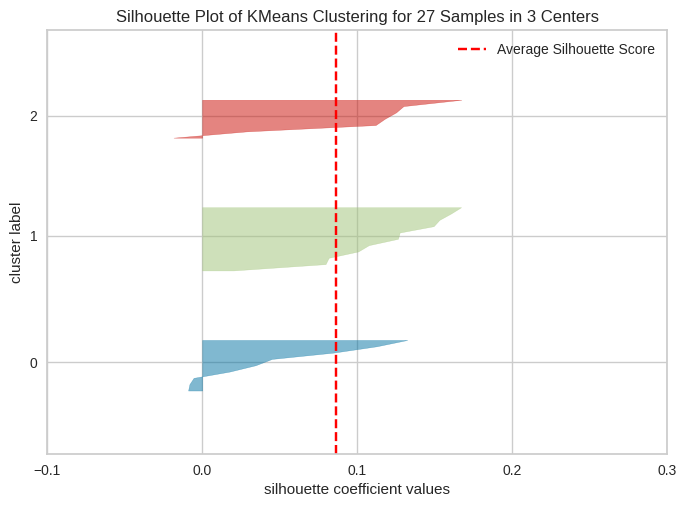

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


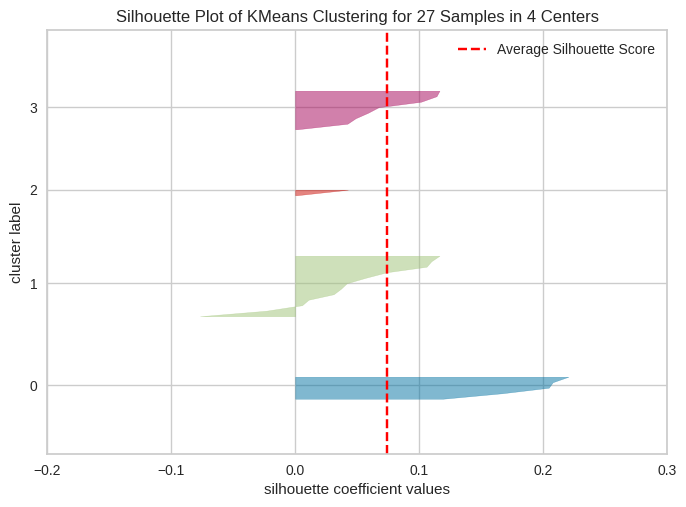

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


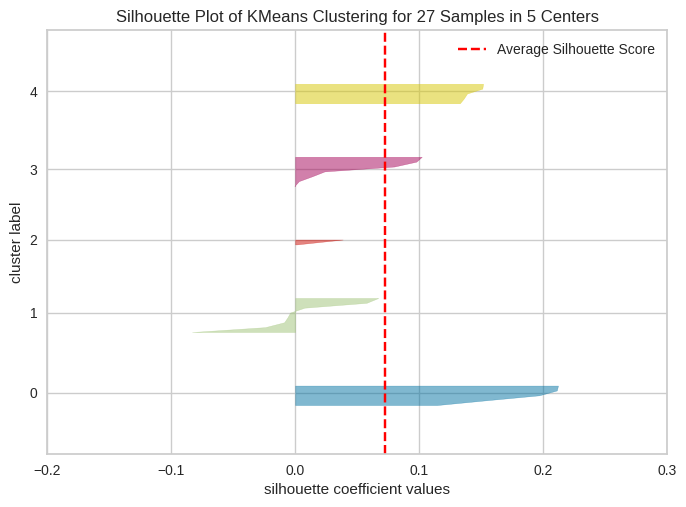

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


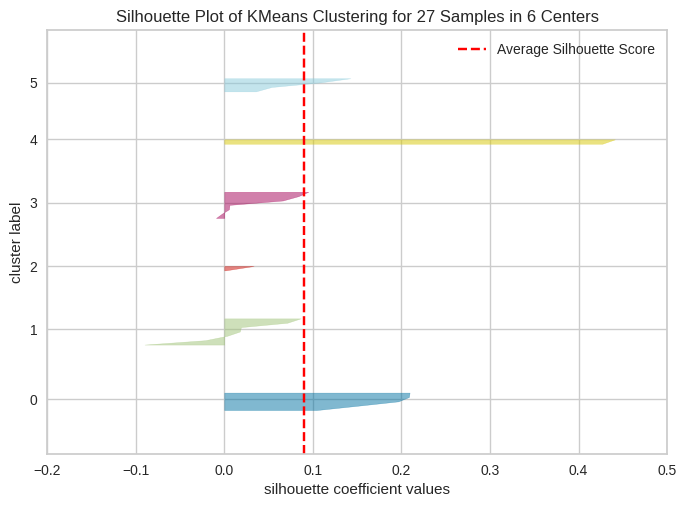

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


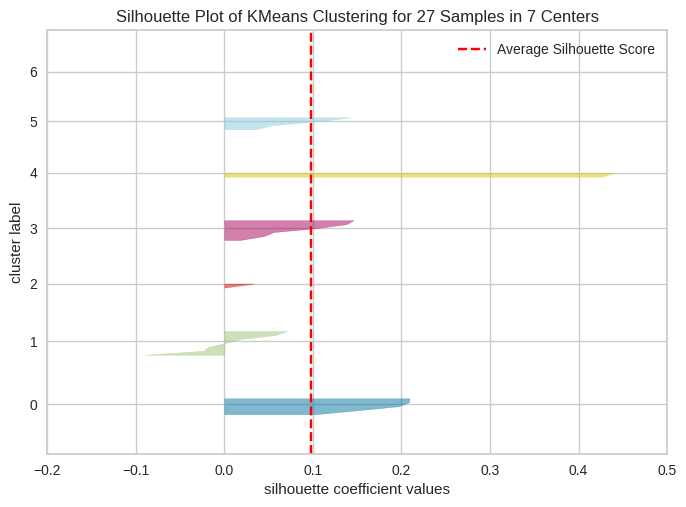

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


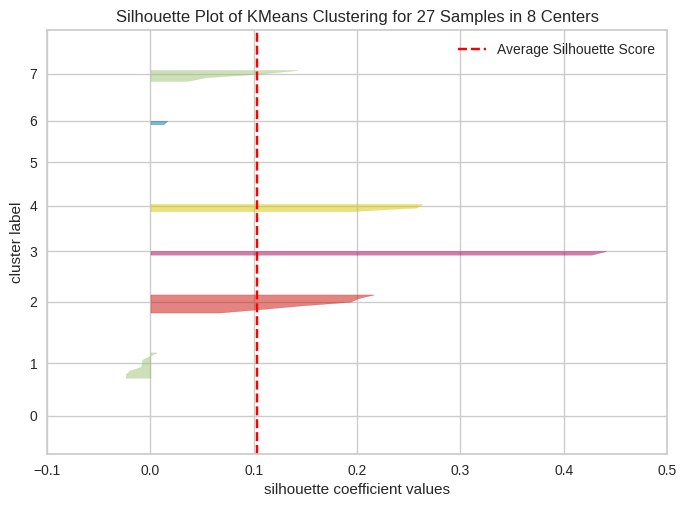

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


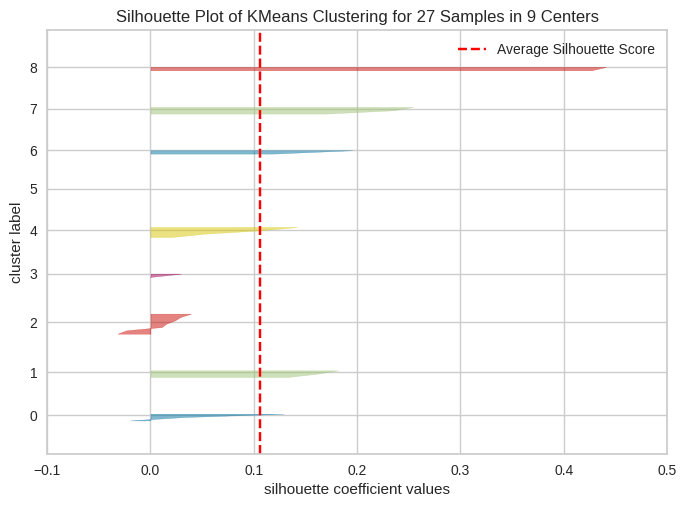

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


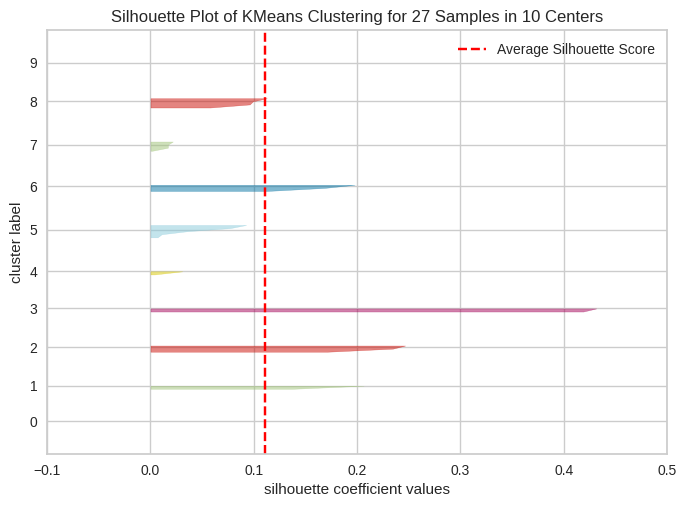

In [15]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
for i in range(2,11):
  kmean = KMeans(n_clusters = i,init = 'k-means++', max_iter=300,random_state=0)
  visualizer = SilhouetteVisualizer(kmean, colors='yellowbrick')
  visualizer.fit(new)        # Fit the data to the visualizer
  visualizer.show()        # Finalize and render the figure
     

In [16]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=8 , init = 'k-means++', max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [17]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000))])

In [18]:
print(kmeans.inertia_)

10.162059207801839


In [19]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                  companies
26       0               (Exxon, XOM)
24       0       (Valero Energy, VLO)
6        0             (Chevron, CVX)
23       1   (Texas Instruments, TXN)
18       1          (Microsoft, MSFT)
0        1              (Apple, AAPL)
2        1             (Amazon, AMZN)
13       2   (Johnson & Johnson, JNJ)
20       2               (Pepsi, PEP)
17       2           (McDonalds, MCD)
14       2            (Coca Cola, KO)
22       3               (Toyota, TM)
25       3            (Walgreen, WBA)
4        3               (Boeing, BA)
11       3                 (IBM, IBM)
10       3               (Honda, HMC)
8        3                  (Ford, F)
12       3              (Intel, INTC)
16       3           (MasterCard, MA)
15       4     (Lockheed Martin, LMT)
19       4    (Northrop Grumman, NOC)
5        5     (Bank of America, BAC)
3        5    (American Express, AXP)
9        5     (General Electric, GE)
7        6           (Evotec SE, EVO)
21       7  

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(new,labels)

0.09709065537942353

In [24]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=8, init = 'k-means++',max_iter=1000)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    labels                  companies
22       0               (Toyota, TM)
4        0               (Boeing, BA)
10       0               (Honda, HMC)
13       1   (Johnson & Johnson, JNJ)
20       1               (Pepsi, PEP)
19       1    (Northrop Grumman, NOC)
15       1     (Lockheed Martin, LMT)
14       1            (Coca Cola, KO)
18       2          (Microsoft, MSFT)
0        2              (Apple, AAPL)
2        2             (Amazon, AMZN)
1        3  (AMC  Entertainment, AMC)
7        3           (Evotec SE, EVO)
8        4                  (Ford, F)
24       4       (Valero Energy, VLO)
3        4    (American Express, AXP)
9        4     (General Electric, GE)
5        4     (Bank of America, BAC)
6        4             (Chevron, CVX)
26       4               (Exxon, XOM)
16       5           (MasterCard, MA)
12       5              (Intel, INTC)
23       5   (Texas Instruments, TXN)
25       6            (Walgreen, WBA)
11       6                 (IBM, IBM)
17       6  

In [25]:
silhouette_score(reduced_data,labels)

0.4510321845523287

<Figure size 800x550 with 0 Axes>

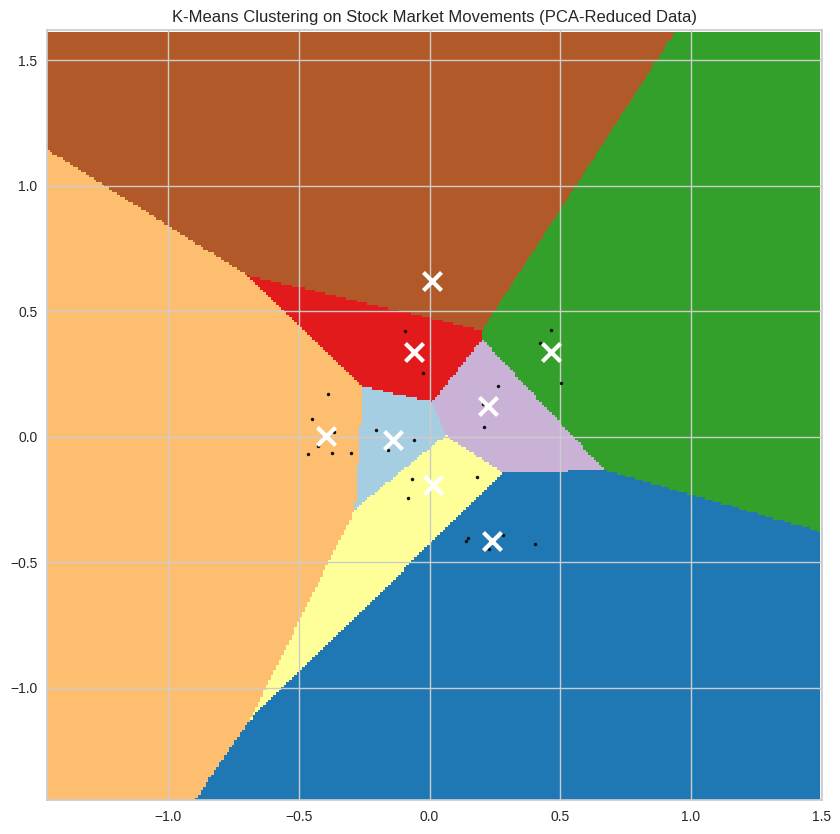

In [26]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

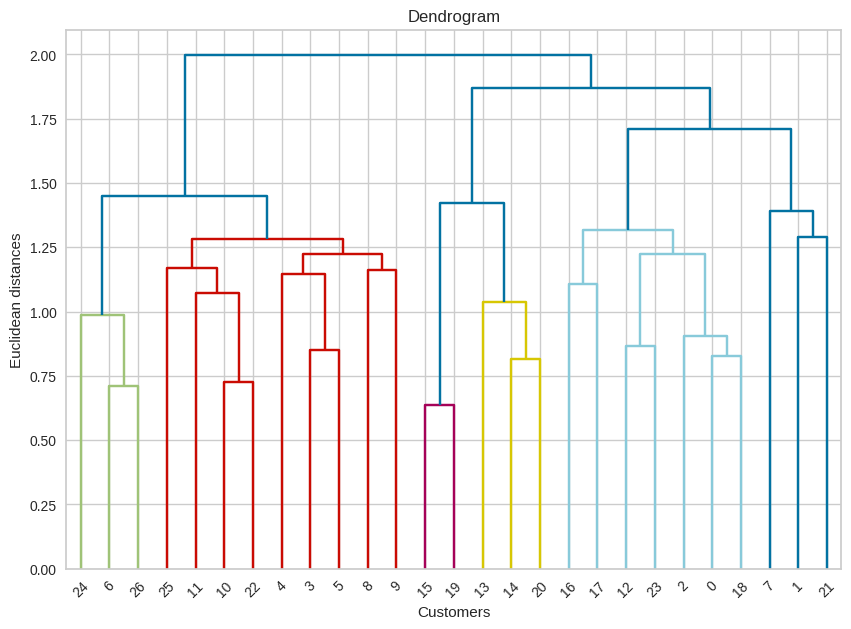

In [27]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))


dendrogram = sch.dendrogram(sch.linkage(new, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')  
cluster.fit_predict(reduced_data)

array([4, 0, 4, 3, 6, 3, 3, 0, 3, 3, 6, 1, 5, 2, 2, 2, 5, 1, 4, 2, 2, 0,
       6, 5, 3, 1, 3])

In [29]:
cl = cluster.fit_predict(reduced_data)

In [30]:
silhouette_score(reduced_data,cl)

0.46935909196649206

In [67]:
#trying DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(reduced_data)
distances, indices = nbrs.kneighbors(reduced_data)

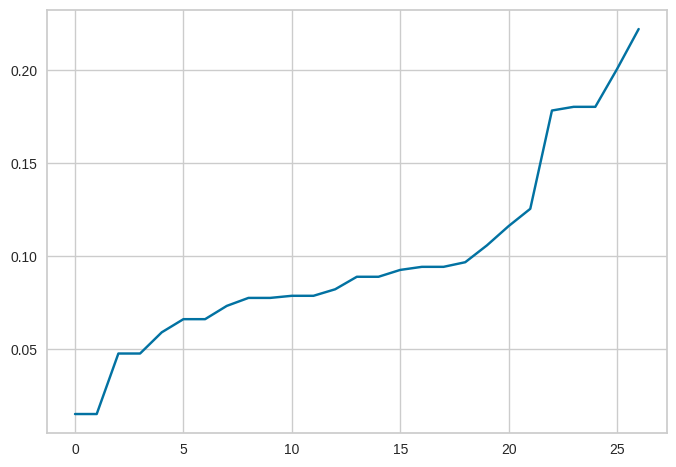

In [68]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [103]:
from sklearn.cluster import DBSCAN
dbscancluster = DBSCAN(eps=0.18, min_samples=4)
dbscancluster.fit(reduced_data)
clusters = dbscancluster.labels_

In [104]:
len(set(clusters))

3

In [105]:
silhouette_score(reduced_data,clusters)

0.49923663304081756